In [184]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import tensorflow as tf

In [185]:
X = np.random.uniform(0,1,20)
X


array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215])

In [186]:
mean = 0
s_d = 1
N = np.random.normal(mean, s_d, 20)
N

array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
        0.6536186 ,  0.8644362 , -0.74216502,  2.26975462, -1.45436567,
        0.04575852, -0.18718385,  1.53277921,  1.46935877,  0.15494743,
        0.37816252, -0.88778575, -1.98079647, -0.34791215,  0.15634897])

[ 1.1921607  -1.18133389 -0.28867505 -1.13238193 -2.09148471 -0.13996717
  1.24661332 -1.37096605  2.04341941 -0.78574038 -0.92007232 -0.36774027
  1.11814883  1.01871165  0.58660785  0.89867372 -0.76109122 -2.84905465
 -1.33230363 -0.5725674 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


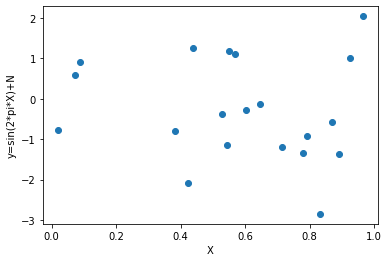

In [187]:
y=np.sin(2*np.pi*X)+N
print(y)
print(X)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()


In [188]:
df = pd.DataFrame({'x':X, 'y':y})
print(df)

           x         y
0   0.548814  1.192161
1   0.715189 -1.181334
2   0.602763 -0.288675
3   0.544883 -1.132382
4   0.423655 -2.091485
5   0.645894 -0.139967
6   0.437587  1.246613
7   0.891773 -1.370966
8   0.963663  2.043419
9   0.383442 -0.785740
10  0.791725 -0.920072
11  0.528895 -0.367740
12  0.568045  1.118149
13  0.925597  1.018712
14  0.071036  0.586608
15  0.087129  0.898674
16  0.020218 -0.761091
17  0.832620 -2.849055
18  0.778157 -1.332304
19  0.870012 -0.572567


In [189]:
df.train=df[0:10]
print(df.train)

X_train = df.train.iloc[:,0].values
print(X_train)

y_train = df.train.iloc[:,1].values
print(y_train)

          x         y
0  0.548814  1.192161
1  0.715189 -1.181334
2  0.602763 -0.288675
3  0.544883 -1.132382
4  0.423655 -2.091485
5  0.645894 -0.139967
6  0.437587  1.246613
7  0.891773 -1.370966
8  0.963663  2.043419
9  0.383442 -0.785740
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
[ 1.1921607  -1.18133389 -0.28867505 -1.13238193 -2.09148471 -0.13996717
  1.24661332 -1.37096605  2.04341941 -0.78574038]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [190]:
x = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

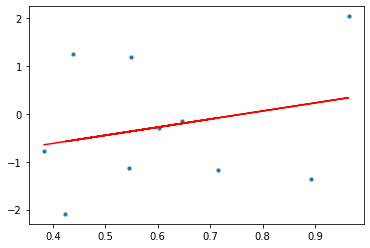

In [191]:
plt.scatter(x,y,s=10)
plt.plot(x,y_pred, color='r')
plt.show()

RMSE: 1.2717577098315476
R2: 0.0
weights:
[[0.]]


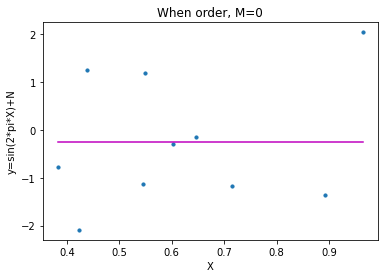

In [192]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=0)
x_poly = polynomial_features.fit_transform(x)

model0 = LinearRegression()
model0.fit(x_poly, y)
y_poly_pred = model0.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print('weights:')
print(model0.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=0')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

RMSE: 1.2516610787428275
R2: 0.03135478551851867
[[0.         1.22072834]]


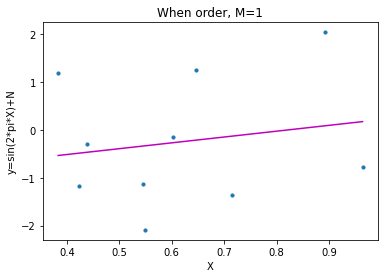

In [193]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)

model1 = LinearRegression()
model1.fit(x_poly, y)
y_poly_pred = model1.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model1.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=1')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

RMSE: 0.9725937278786397
R2: 0.4151369688022982
[[   0.         -248.15464422  387.55479061 -191.01406685]]


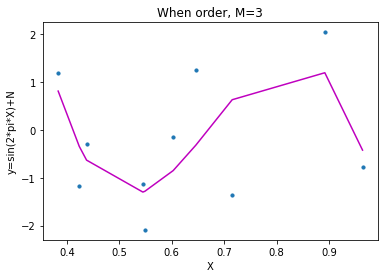

In [194]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model3 = LinearRegression()
model3.fit(x_poly, y)
y_poly_pred = model3.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model3.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=3')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

RMSE: 1.1059584422755567e-06
R2: 0.9999999999992437
[[ 0.00000000e+00  1.18595932e+08 -8.27948784e+08  3.33303727e+09
  -8.52528227e+09  1.43662710e+10 -1.59475611e+10  1.12439829e+10
  -4.56863443e+09  8.15015880e+08]]


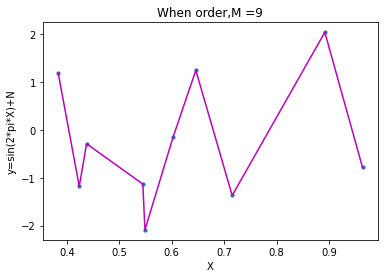

In [195]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)

model9 = LinearRegression()
model9.fit(x_poly, y)
y_poly_pred = model9.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model9.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

In [196]:
print(model0.coef_)
print(model1.coef_)
print(model3.coef_)
print(model9.coef_)

[[0.]]
[[0.         1.22072834]]
[[   0.         -248.15464422  387.55479061 -191.01406685]]
[[ 0.00000000e+00  1.18595932e+08 -8.27948784e+08  3.33303727e+09
  -8.52528227e+09  1.43662710e+10 -1.59475611e+10  1.12439829e+10
  -4.56863443e+09  8.15015880e+08]]


In [197]:
data = {'M=0':[0,"","","","","","","","","" ],'M=1':[0,1.22072834,"","","","","","","",""],'M=3':[0,-248.15464422,387.55479061,-191.01406685,"","","","","",""],'M=9':[ 0,118595932,-827948784,3333037270,
   -8525282270, 14366271000,-15947561100,11243982900,-4568634430,815015880]}
print(data)

df.w = pd.DataFrame(data, index =['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

df.w

{'M=0': [0, '', '', '', '', '', '', '', '', ''], 'M=1': [0, 1.22072834, '', '', '', '', '', '', '', ''], 'M=3': [0, -248.15464422, 387.55479061, -191.01406685, '', '', '', '', '', ''], 'M=9': [0, 118595932, -827948784, 3333037270, -8525282270, 14366271000, -15947561100, 11243982900, -4568634430, 815015880]}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,M=0,M=1,M=3,M=9
w0,0,0,0,0
w1,,1.22073,-248.155,118595932
w2,,,387.555,-827948784
w3,,,-191.014,3333037270
w4,,,,-8525282270
w5,,,,14366271000
w6,,,,-15947561100
w7,,,,11243982900
w8,,,,-4568634430
w9,,,,815015880


In [198]:
train_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    train_rmse.append(rmse)

RMSE: 1.2717577098315476
RMSE: 1.2516610787428275
RMSE: 1.223608775076313
RMSE: 0.9725937278786397
RMSE: 0.9714749747422653
RMSE: 0.8162029262453139
RMSE: 0.48995687937019017
RMSE: 0.24535084756015582
RMSE: 0.20965838656772892
RMSE: 1.1059584422755567e-06


In [199]:
df.test=df[10:19]
print(df.test)

           x         y
10  0.791725 -0.920072
11  0.528895 -0.367740
12  0.568045  1.118149
13  0.925597  1.018712
14  0.071036  0.586608
15  0.087129  0.898674
16  0.020218 -0.761091
17  0.832620 -2.849055
18  0.778157 -1.332304


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [200]:
Xt= df.test.iloc[:,1].values
print(Xt)

[-0.92007232 -0.36774027  1.11814883  1.01871165  0.58660785  0.89867372
 -0.76109122 -2.84905465 -1.33230363]


In [201]:
yt = df.test.iloc[:,1].values
print(yt)

[-0.92007232 -0.36774027  1.11814883  1.01871165  0.58660785  0.89867372
 -0.76109122 -2.84905465 -1.33230363]


In [202]:
x = Xt[:, np.newaxis]
y = yt[:, np.newaxis]

In [203]:
test_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    test_rmse.append(rmse)

RMSE: 1.2533118179082696
RMSE: 8.457231124323202e-16
RMSE: 7.39222918264492e-16
RMSE: 1.2947314098277875e-15
RMSE: 2.6429241985327625e-15
RMSE: 5.506558220156971e-15
RMSE: 6.343834181149101e-15
RMSE: 3.81497467223144e-14
RMSE: 8.705856517067538e-14
RMSE: 3.5942702402611056e-14


In [204]:
# intialise data of lists.
data1 = {'M':[0,1,2,3,4,5,6,7,8,9],'Train.RMSE':train_rmse,'Test.RMSE':test_rmse}
print(data)
# Creates pandas DataFrame.
df1 = pd.DataFrame(data1)

# print the data
df1

{'M=0': [0, '', '', '', '', '', '', '', '', ''], 'M=1': [0, 1.22072834, '', '', '', '', '', '', '', ''], 'M=3': [0, -248.15464422, 387.55479061, -191.01406685, '', '', '', '', '', ''], 'M=9': [0, 118595932, -827948784, 3333037270, -8525282270, 14366271000, -15947561100, 11243982900, -4568634430, 815015880]}


,M,Train.RMSE,Test.RMSE
0,0,1.271758,1.253312e+00
1,1,1.251661,8.457231e-16
2,2,1.223609,7.392229e-16
3,3,0.972594,1.294731e-15
4,4,0.971475,2.642924e-15
5,5,0.816203,5.506558e-15
6,6,0.489957,6.343834e-15
7,7,0.245351,3.814975e-14
8,8,0.209658,8.705857e-14
9,9,0.000001,3.594270e-14


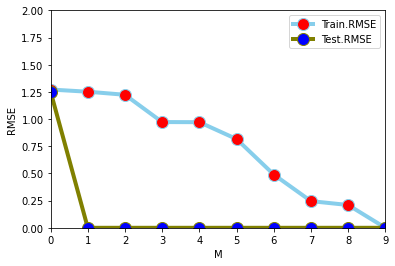

In [205]:
plt.plot( 'M', 'Train.RMSE', data=df1, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'M', 'Test.RMSE', data=df1, marker='o',markerfacecolor='blue',markersize=12, color='olive', linewidth=4)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('M')
plt.ylim((0,2))
plt.xlim((0,9))
plt.show()

In [208]:
np.random.seed(100)
X2 = np.random.uniform(0,1,120)
print(X2)
mean, s_d = 0, 1 # mean and standard deviation
N = np.random.normal(mean, s_d, 120)
print(N)
import matplotlib.pyplot as plt
y2=np.sin(2*np.pi*X2)+N
print(y2)
print(X2)

[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333 0.89132195 0.20920212
 0.18532822 0.10837689 0.21969749 0.97862378 0.81168315 0.17194101
 0.81622475 0.27407375 0.43170418 0.94002982 0.81764938 0.33611195
 0.17541045 0.37283205 0.00568851 0.25242635 0.79566251 0.01525497
 0.59884338 0.60380454 0.10514769 0.38194344 0.03647606 0.89041156
 0.98092086 0.05994199 0.89054594 0.5769015  0.74247969 0.63018394
 0.58184219 0.02043913 0.21002658 0.54468488 0.76911517 0.25069523
 0.28589569 0.85239509 0.97500649 0.88485329 0.35950784 0.59885895
 0.35479561 0.34019022 0.17808099 0.23769421 0.04486228 0.50543143
 0.37625245 0.5928054  0.62994188 0.14260031 0.9338413  0.94637988
 0.60229666 0.38776628 0.363188   0.20434528 0.27676506 0.24653588
 0.173608   0.96660969 0.9570126  0.59797368 0.73130075 0.34038522
 0.0920556  0.46349802 0.50869889 0.08846017 0.52803522 0.99215804
 0.39503593 0.33559644 0.80545054 0.75434899 0.31306644 0.6340

RMSE: 1.0113260195943599
R2: 0.3925993349701954


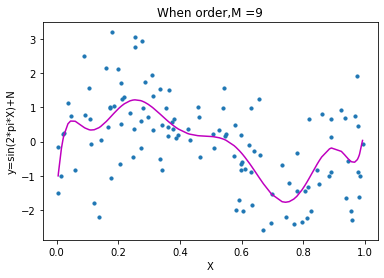

In [209]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x2_poly = polynomial_features.fit_transform(X2.reshape(120,1))

# transforming the data to include another axis
x2 = X2[:, np.newaxis]
y2= y2[:, np.newaxis]

model = LinearRegression()
model.fit(x2_poly, y2)
y2_poly_pred = model.predict(x2_poly)

rmse = np.sqrt(mean_squared_error(y2,y2_poly_pred))
r2 = r2_score(y2,y2_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_poly_pred), key=sort_axis)
x2, y2_poly_pred = zip(*sorted_zip)
plt.plot(x2, y2_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

In [210]:
def regularizeRidge(alpha):
    if alpha < 0: alpha = math.exp(alpha)
    else:
        print("alpha = ",alpha)
        if alpha != 0: print("ln(alpha) = ", math.log(alpha))
    polynomial_features= PolynomialFeatures(degree=9)
    x_transformed =  polynomial_features.fit_transform(X2.reshape(120,1))
    poly_linear_model = Ridge(alpha = alpha)
    poly_linear_model.fit(x_transformed, y2)
    return poly_linear_model

def chartRidge(alpha):
    model = regularizeRidge(alpha)
    xx = np.linspace(0, 1, 120)
    x_transformed =polynomial_features.fit_transform(xx.reshape(120,1))
    yy = model.predict(x_transformed)
    plt.plot(xx, yy,label=alpha)
    plt.scatter(X_train, y_train)
    plt.scatter(Xt, yt, c = 'r')
    plt.legend()

alpha =  1
ln(alpha) =  0.0


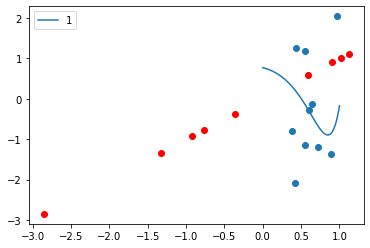

In [211]:
chartRidge(1)

alpha =  0.1
ln(alpha) =  -2.3025850929940455


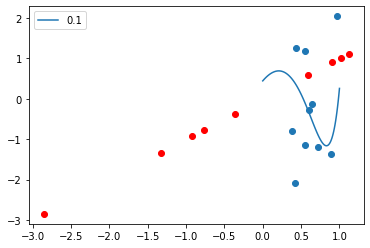

In [212]:
chartRidge(0.1)

alpha =  0.01
ln(alpha) =  -4.605170185988091


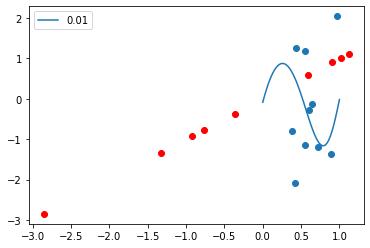

In [213]:
chartRidge(0.01)

alpha =  0.001
ln(alpha) =  -6.907755278982137


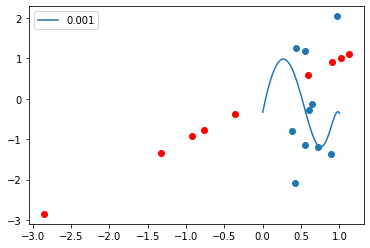

In [214]:
chartRidge(0.001)

alpha =  0.0001
ln(alpha) =  -9.210340371976182


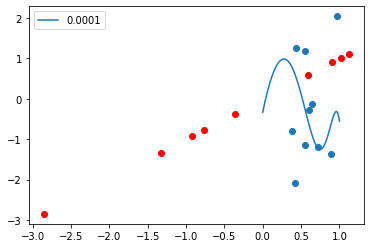

In [215]:
chartRidge(0.0001)

alpha =  1e-05
ln(alpha) =  -11.512925464970229


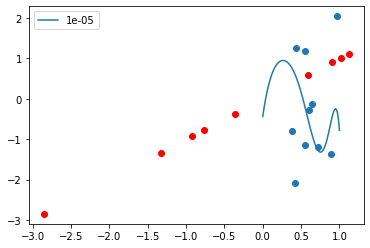

In [216]:
chartRidge(0.00001)

In [217]:
def getMse(Y, yy):
    standard = tf.square(Y - yy)
    mse = tf.reduce_mean(standard)
    return mse.numpy()


train_error_ridge = np.zeros(30)
test_error_ridge = np.zeros(30)

def getErrorRidge(i:int,  model) :     # A new error function
    xx_transformed_test = polynomial_features.fit_transform(Xt.reshape(Xt.shape[0], 1))
    xx_transformed_train = polynomial_features.fit_transform(X_train.reshape(X_train.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)
    test_error_ridge[i] = getMse(yt, yy_test)
    train_error_ridge[i] = getMse(y_train, yy_train)

In [218]:
xx = list(range(-30, 0))
for i in xx:
    model = regularizeRidge(i)
    getErrorRidge(i, model)

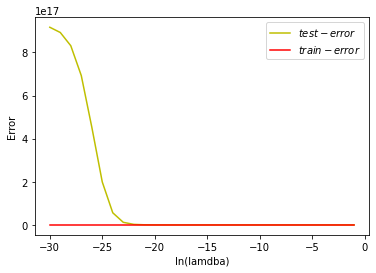

In [219]:
xx = list(range(-30, 0))
plt.plot(xx, test_error_ridge, label = "$test-error$", c = 'y')
plt.plot(xx, train_error_ridge, label = "$train-error$", c = 'r')

plt.xlabel('ln(lamdba)')

plt.ylabel('Error')
plt.legend()

In [220]:
best_lambda = 0
for i in range(-30,0):
    if test_error_ridge[i+30] == test_error_ridge.min(): best_lambda = i
print("best ln(lambda)based on my analysis = ", best_lambda)
best_lambda_0 = math.exp(best_lambda)
print("best lambda = ", best_lambda_0)
print("In Conclusion of this analysis, the model with input ln(lamdba) = ",best_lambda,", lambda = ",best_lambda_0," will provide best test performance.")

best ln(lambda)based on my analysis =  -2
best lambda =  0.1353352832366127
In Conclusion of this analysis, the model with input ln(lamdba) =  -2 , lambda =  0.1353352832366127  will provide best test performance.
